# 畳み込みニューラルネットワーク

- Convolutional Neural Network (CNN)
- ヒトの視神経及び視覚野がモデル
- 画像認識に広く使われている

# CNNの構造

- 畳み込み層
複数のフィルタリング
- プーリング層
特徴が抽出できるように画像サイズの削減
- 全結合層
通常のニューラルネットワークでできている

# ヒトの視神経と視覚野

- 網膜上の受容体
 - 1億以上あり、入力から特徴を抽出する
 - 畳み込み層、プーリング層に相当

- 脳の視覚野
 - 受け取った特徴量から物体を認識する
 - 全結合層に相当

# 畳み込み層

- 元画像に複数のフィルタをかける
 - フィルタの画素値と元画像の画素値をかける
- 畳み込みの結果
 - フィルタ数分だけ増える

# プーリング層

- 畳み込み結果をn×mの領域で区切る
- 各領域の最大値をとる
- プーリング層の結果
 - 総画素数÷(n×m)のサイズに削減される→計算量削減、過学習抑制
 - 微小なピクセルの違いに頑強

# 全結合層

- 通常のニューラルネットワーク
- 抽出した特徴量に基づき、演算を行い結果を出力する

## ドロップアウト

- 全結合層で使用される技法
- 層からニューロンをランダムに取り除く
- 毎回異なるネットワーク構成にすることで、過学習を防ぐ
- ドロップアウト率は0.5に設定することが多い


# CNNの学習

- 誤差を逆に伝播させる
- 全結合層だけでなく畳み込みそうのフィルタにも誤差を伝播させる
 - プーリング層は最大値取得しかやっていないのでパラメータがない
 - 畳み込み層はフィルタ自体がパラメータに相当する機能となる

# MNISTデータセット

- 手書きの０から９までの数字を読み取る
- 手書きの文字と正解値のセット


In [1]:
# coding: UTF-8

import chainer
from chainer import Variable, Chain, optimizers, serializers, datasets
import chainer.links as L
import chainer.functions as F

from chainer.datasets import tuple_dataset
from chainer import training, iterators
from chainer.training import extensions

import numpy as np

In [2]:
# MNISTデータの読み込み
mnist_data = datasets.get_mnist(ndim=3) # 1x28x28
train_data = mnist_data[0]
test_data = mnist_data[1]

print("Train:", len(train_data))
print("Test:", len(test_data))

Train: 60000
Test: 10000


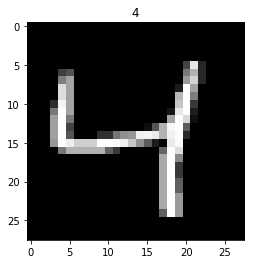

In [5]:
# MNIST画像の表示
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

index = 2
plt.imshow(train_data[index][0].reshape(28, 28), cmap = 'gray')
plt.title(train_data[index][1])
plt.show()